<a href="https://colab.research.google.com/github/hari23t/nmhouseprice/blob/main/house.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error


In [3]:
df=pd.read_csv("/content/data.csv")
df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2384000.0,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA


In [4]:
df['date'] = pd.to_datetime(df['date'])
df['year'] = df['date'].dt.year
df['month'] = df['date'].dt.month
df['day'] = df['date'].dt.day


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   date           4600 non-null   datetime64[ns]
 1   price          4600 non-null   float64       
 2   bedrooms       4600 non-null   float64       
 3   bathrooms      4600 non-null   float64       
 4   sqft_living    4600 non-null   int64         
 5   sqft_lot       4600 non-null   int64         
 6   floors         4600 non-null   float64       
 7   waterfront     4600 non-null   int64         
 8   view           4600 non-null   int64         
 9   condition      4600 non-null   int64         
 10  sqft_above     4600 non-null   int64         
 11  sqft_basement  4600 non-null   int64         
 12  yr_built       4600 non-null   int64         
 13  yr_renovated   4600 non-null   int64         
 14  street         4600 non-null   object        
 15  city           4600 n

In [6]:
print("duplicated rowes before:",df.duplicated().sum())
df.drop_duplicates(inplace=True)
print("duplicated rowes after:",df.duplicated().sum())

duplicated rowes before: 0
duplicated rowes after: 0


In [7]:
print("\nmissing values:\n",df.isnull().sum())


missing values:
 date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
year             0
month            0
day              0
dtype: int64


In [8]:
df.columns

Index(['date', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'view', 'condition', 'sqft_above',
       'sqft_basement', 'yr_built', 'yr_renovated', 'street', 'city',
       'statezip', 'country', 'year', 'month', 'day'],
      dtype='object')

In [9]:
df=df.drop(['date','sqft_lot','floors','waterfront','view','condition','yr_renovated','street','city','country'],axis=1)

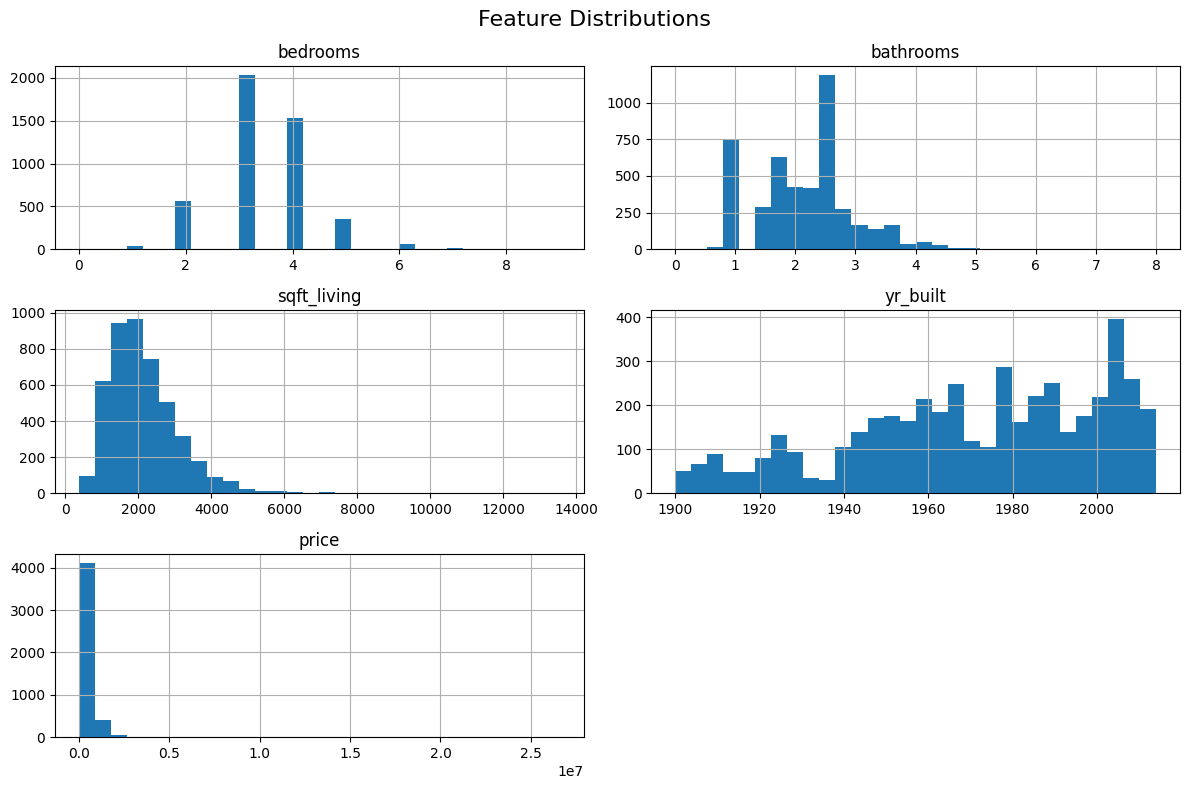

In [10]:
features=['bedrooms','bathrooms','sqft_living','yr_built']
x=df[features]
y=df['price']
df [features + ['price']].hist(bins=30,figsize=(12,8))
plt.suptitle("Feature Distributions", fontsize=16)
plt.tight_layout()
plt.show()


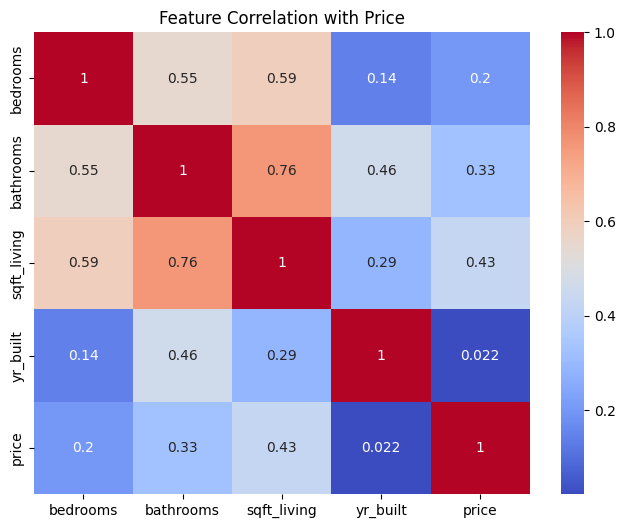

In [11]:
plt.figure(figsize=(8,6))
sns.heatmap(df [features +['price']].corr(), annot=True,cmap='coolwarm')
plt.title("Feature Correlation with Price")
plt.show()


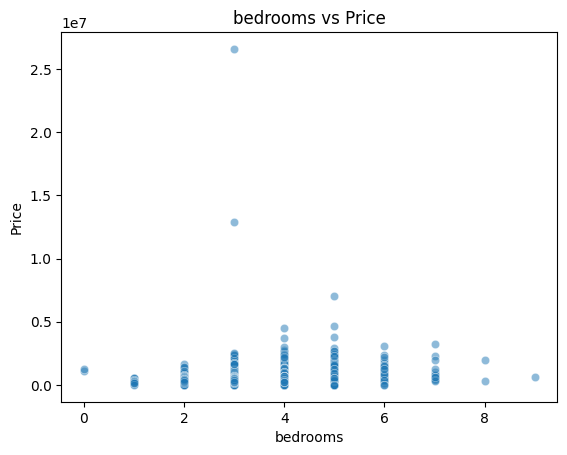

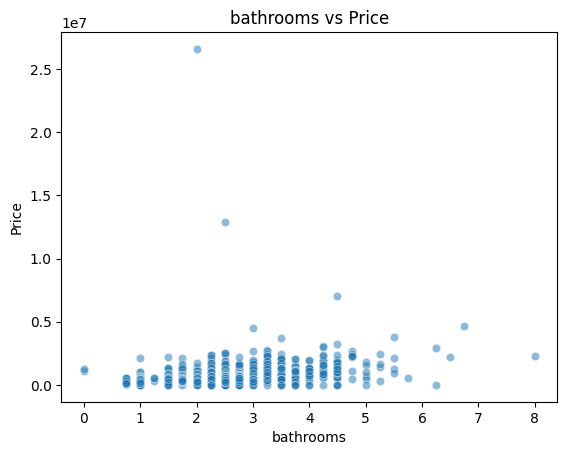

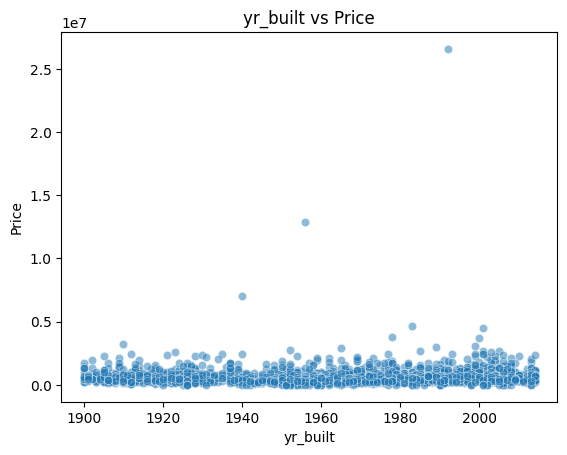

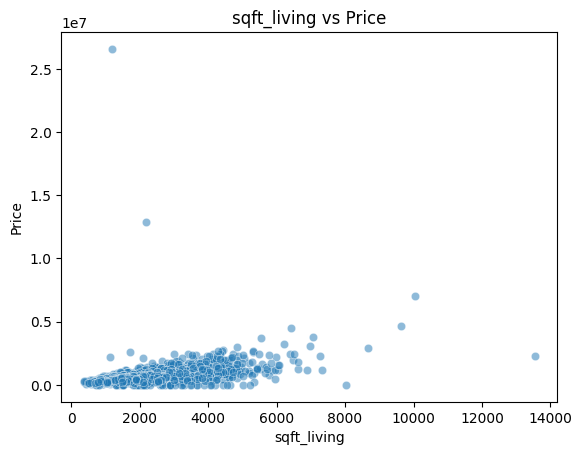

In [12]:
import seaborn as sns
sns.scatterplot(data=df, x='bedrooms',y='price', alpha=0.5)
plt.title('bedrooms vs Price')
plt.xlabel('bedrooms')
plt.ylabel('Price')
plt.show()
sns.scatterplot(data=df, x='bathrooms',y='price', alpha=0.5)
plt.title('bathrooms vs Price')
plt.xlabel('bathrooms')
plt.ylabel('Price')
plt.show()
sns.scatterplot(data=df, x='yr_built',y='price', alpha=0.5)
plt.title('yr_built vs Price')
plt.xlabel('yr_built')
plt.ylabel('Price')
plt.show()
sns.scatterplot(data=df, x='sqft_living',y='price', alpha=0.5)
plt.title('sqft_living vs Price')
plt.xlabel('sqft_living')
plt.ylabel('Price')
plt.show()

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)
model = LinearRegression()
model.fit(x_train_scaled, y_train)
y_pred = model.predict(x_test_scaled)
print("\nModel Evaluation:")
print("MSE:",mean_squared_error(y_test,y_pred))
print("R2 Score:", r2_score(y_test, y_pred))
print("MAE:", mean_absolute_error(y_test,y_pred))


Model Evaluation:
MSE: 807464431127.1014
R2 Score: 0.04137569530157792
MAE: 208682.34920298946


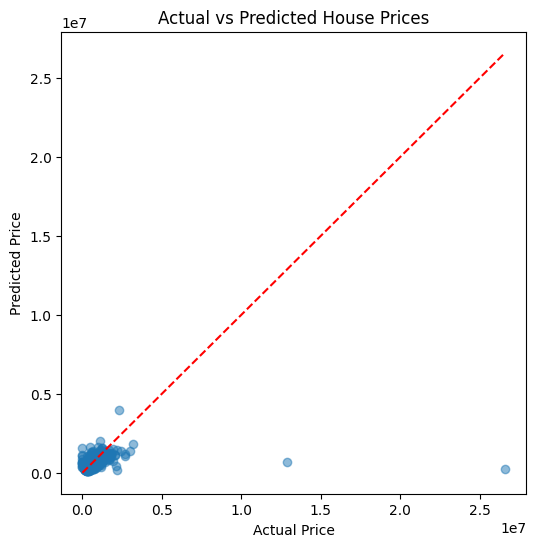

In [15]:
plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()],[y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted House Prices")
plt.show()

In [16]:
df[['bedrooms','bathrooms','sqft_living','yr_built']].describe()

,bedrooms,bathrooms,sqft_living,yr_built
count,4600.000000,4600.000000,4600.000000,4600.000000
mean,3.400870,2.160815,2139.346957,1970.786304
std,0.908848,0.783781,963.206916,29.731848
min,0.000000,0.000000,370.000000,1900.000000
25%,3.000000,1.750000,1460.000000,1951.000000
50%,3.000000,2.250000,1980.000000,1976.000000
75%,4.000000,2.500000,2620.000000,1997.000000
max,9.000000,8.000000,13540.000000,2014.000000


In [17]:
bedrooms = int(input("Enter number of bedrooms: "))
bathrooms = float(input("Enter number of bathrooms: "))
sqft_living = int(input("Enter square footage (sqft_living): "))
yr_built = int(input("Enter year built: "))
new_house = pd.DataFrame([{
    'bedrooms': bedrooms,
    'bathrooms': bathrooms,
    'sqft_living': sqft_living,
    'yr_built': yr_built
}])
new_house_scaled = scaler.transform(new_house)
predicted_price = model.predict(new_house_scaled)
print("Predicted House Price: $", round(predicted_price[0],2))

Enter number of bedrooms: 3
Enter number of bathrooms: 4
Enter square footage (sqft_living): 10000
Enter year built: 2000
Predicted House Price: $ 2977055.22
